In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-notebook')

%matplotlib inline

In [2]:
orig_data = pd.read_csv('../data/kc_house_data.csv', usecols=['price', 'yr_built','condition', 'grade', 'heat_source'])
df1 = orig_data.copy()
df1.describe()

,price,yr_built
count,3.015500e+04,30155.000000
mean,1.108536e+06,1975.163953
std,8.963857e+05,32.067362
min,2.736000e+04,1900.000000
25%,6.480000e+05,1953.000000
50%,8.600000e+05,1977.000000
75%,1.300000e+06,2003.000000
max,3.075000e+07,2022.000000


In [3]:
df1['Age'] = 2022- df1['yr_built'].astype(int)
grade_num = []
for index, row in df1.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))
df1['grade_num'] = grade_num

df1['heat_num'] = df1['heat_source'].replace({'Gas': 1, 'Electricity' : 2, 'Oil': 3, 'Gas/Solar': 4, 'Electricity/Solar':5, 'Oil/Solar':6, 'Other':7 })
df1['condition_num'] = df1['condition'].replace({'Poor': 1, 'Fair' : 2, 'Average': 3, 'Good': 4, 'Very Good':5 })
df= df1[['price','Age', 'grade_num', 'heat_num', 'condition_num']]
df.head()

,price,Age,grade_num,heat_num,condition_num
0,675000.0,53,7,1.0,4
1,920000.0,72,7,3.0,3
2,311000.0,66,7,1.0,3
3,775000.0,12,9,1.0,3
4,592500.0,10,7,2.0,3


In [4]:
df_scld = (df - df.mean()) / df.std(ddof=0)
ss = StandardScaler()

In [21]:
ss.fit(df)

StandardScaler()

In [22]:
df_scld1 = ss.transform(df)
df_scld1

array([[-0.48365681,  0.19222208, -0.56692001, -0.60525496,  0.75259454],
       [-0.21033242,  0.78473466, -0.56692001,  2.21748777, -0.67088212],
       [-0.88973876,  0.59762542, -0.56692001, -0.60525496, -0.67088212],
       ...,
       [-0.34420559, -0.61858459, -0.56692001, -0.60525496, -0.67088212],
       [-0.37209583, -0.96161819,  0.30343295, -0.60525496, -0.67088212],
       [-0.67888851,  0.31696157, -0.56692001,  2.21748777, -0.67088212]])

In [23]:
np.allclose(df_scld1, df_scld)

False

In [15]:
X = df.drop(columns='price')
y = df['price']
# print(X.shape)
# print(y.shape)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [17]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [18]:
formula = 'price ~ grade_num'
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                 1.090e+04
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        01:30:36   Log-Likelihood:            -3.3759e+05
No. Observations:               22616   AIC:                         6.752e+05
Df Residuals:                   22614   BIC:                         6.752e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.283e+06   3.29e+04    -69.498      0.000   -2.35e+06   -2.22e+06
grade_num   4.436e+05   4248.563    104.410      0.000    4.35e+05    4.52e+05
==============================================================================
Omnibus:                    32773.021   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33082555.989
Skew:                           8.318   Prob(JB):                         0.00
Kurtosis:                     189.629   Cond. No.                         52.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
train_predic = model.predict(train_df['grade_num'])
train_predic

25292    2.152577e+06
28803    8.217950e+05
2035     2.596171e+06
22761    1.265389e+06
10895    1.265389e+06
             ...     
15288    8.217950e+05
26243    1.265389e+06
11513    3.039765e+06
1688     8.217950e+05
5994     8.217950e+05
Length: 22616, dtype: float64

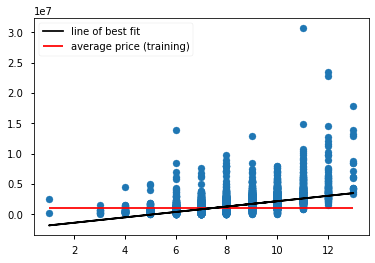

In [12]:
plt.scatter(train_df['grade_num'], train_df['price'])
plt.plot(train_df['grade_num'], train_predic, color='black', label='line of best fit')

plt.hlines(y=train_df['price'].mean(), color='red', label='average price (training)',
           xmin=train_df['grade_num'].min(), xmax=train_df['grade_num'].max())
plt.legend()
plt.show()